In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [12]:
# Clean columns
df["discounted_price"] = df["discounted_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["actual_price"] = df["actual_price"].str.replace("₹", "").str.replace(",", "").astype(float)
df["rating_count"] = df["rating_count"].str.replace(",", "")
df["discount_percentage"] = df["discount_percentage"].str.replace("%", "").astype(float)

In [13]:
# Create a new column: discount amount
df["discount_amount"] = df["actual_price"] - df["discounted_price"]


In [14]:
# Top 10 most-reviewed products
top_reviewed = df.sort_values("rating_count", ascending=False).head(10)


In [15]:
# Group by category and compute mean rating and average discount
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df["discount_percentage"] = pd.to_numeric(df["discount_percentage"], errors="coerce")


df["clean_category"] = df["category"].apply(lambda x: x.split("|")[-1])

category_summary = df.groupby("clean_category").agg({
    "rating": "mean",
    "discount_percentage": "mean",
    "rating_count": "sum"
}).sort_values("rating_count", ascending=False).head(10)

category_summary

,rating,discount_percentage,rating_count
clean_category,,,
LaptopSleeves&Slipcases,4.2500,61.833333,99401133097012868109222860
On-Ear,4.0625,52.375000,97175107151335846002613797427759717491188
DigitalScales,4.3000,23.500000,96957
BluetoothAdapters,4.3000,33.000000,95116
PaintingMaterials,4.5000,0.000000,9427
USBHubs,3.9400,43.400000,93853201212516628566
Notepads&MemoBooks,4.2500,62.000000,93447429
Shower&WallMounts,4.1000,82.000000,9340
DomeCameras,4.1000,42.600000,9311218803606446965554


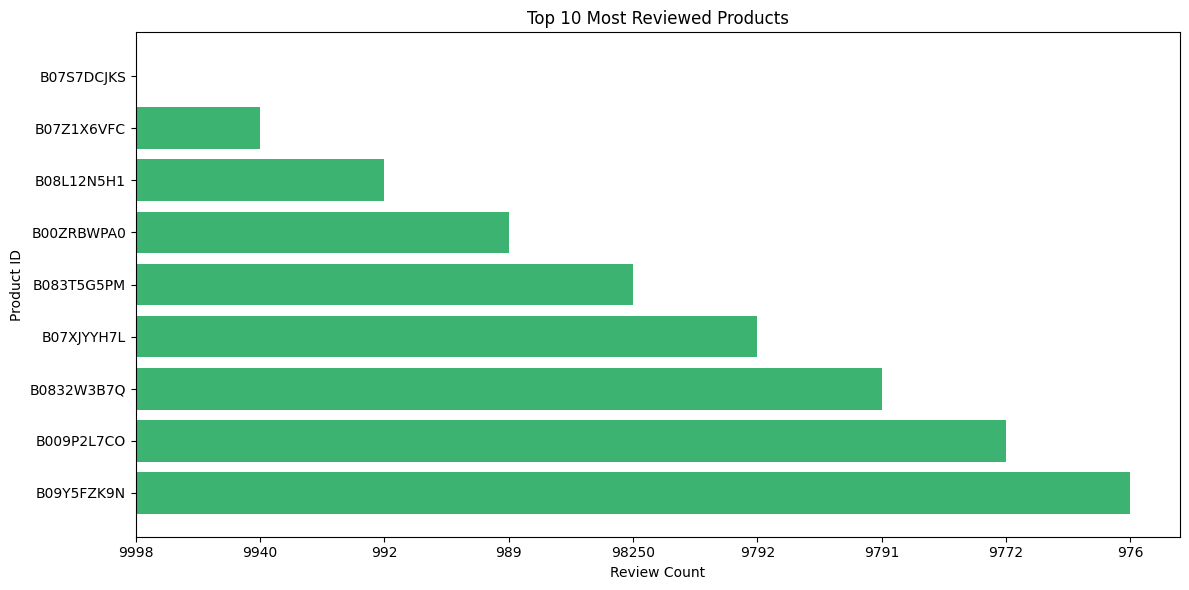

In [16]:
plt.figure(figsize=(12, 6))
plt.barh(top_reviewed["product_id"], top_reviewed["rating_count"], color="mediumseagreen")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Review Count")
plt.ylabel("Product ID")
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()


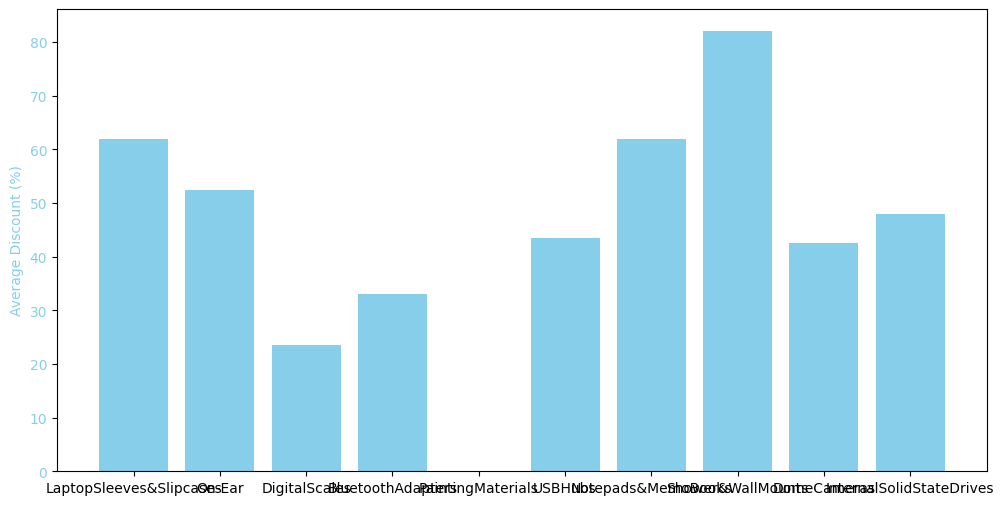

In [17]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(category_summary.index, category_summary["discount_percentage"], color="skyblue")
ax1.set_ylabel("Average Discount (%)", color="skyblue")
ax1.tick_params(axis='y', labelcolor="skyblue")

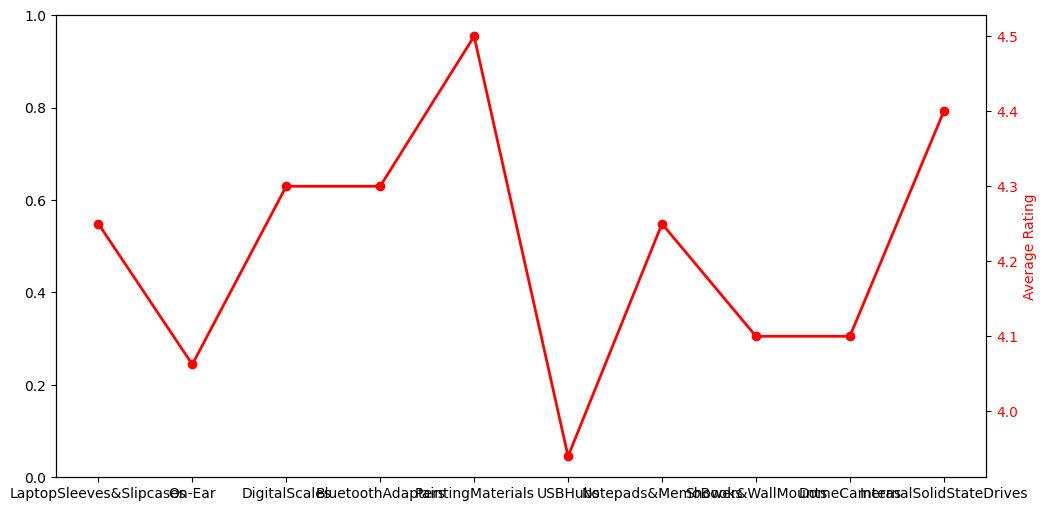

In [18]:

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
ax2.plot(category_summary.index, category_summary["rating"], color="red", marker="o", linewidth=2)
ax2.set_ylabel("Average Rating", color="red")
ax2.tick_params(axis='y', labelcolor="red")
